 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [67]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [68]:
# Reading whale returns
whale_returns_csv = Path("/Users/jiwookkim/Desktop/CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates = True, infer_datetime_format = True)

print(whale_returns.head(5))

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  


In [69]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [70]:
# Drop nulls
whale_returns.dropna(inplace=True)

#Checking nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [71]:
# Reading algorithmic returns
algo_returns_csv = Path("/Users/jiwookkim/Desktop/CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates = True, infer_datetime_format=True)

algo_returns.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [72]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [73]:
# Drop nulls
algo_returns.dropna(inplace=True)

#Checking nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [74]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("/Users/jiwookkim/Desktop/CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

print(sp500_history.head(5))
print(sp500_history.Close.head(5))


               Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06
Date
2019-04-23    $2933.68
2019-04-22    $2907.97
2019-04-18    $2905.03
2019-04-17    $2900.45
2019-04-16    $2907.06
Name: Close, dtype: object


In [75]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [76]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
sp500_history['Close'] = sp500_history['Close'].astype(float)
print()
print(sp500_history.head(5))
print(sp500_history.dtypes)


              Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06
Close    float64
dtype: object


In [77]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head(5)

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [78]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head(5)

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [79]:
# Rename Column
sp500_returns = sp500_returns.rename(columns={
    "Close":"S&P 500"
})

sp500_returns.head(5)

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [80]:
# Concatenate all DataFrames into a single DataFrame
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis='columns', join='inner')
combined_returns.dropna(inplace=True)

print(combined_returns.head(5))
print("-----------------------------------------------------")
print(combined_returns.dtypes)
print("-----------------------------------------------------")

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

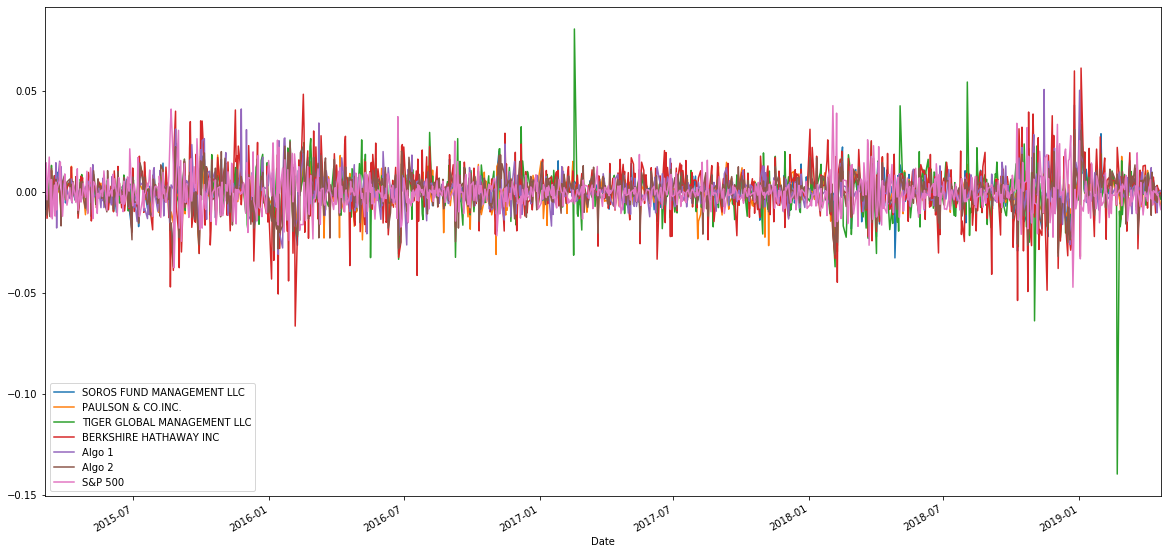

In [81]:
# Plot daily returns
combined_returns.plot(legend=True, figsize=(20,10))

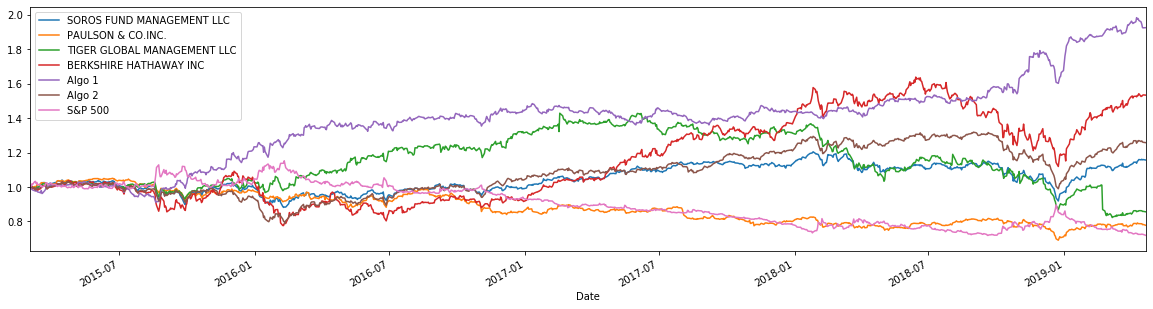

In [82]:
# Plot cumulative returns
cumulative_returns = (1+ combined_returns).cumprod()
cumulative_returns.plot(legend=True, figsize=(20, 5))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

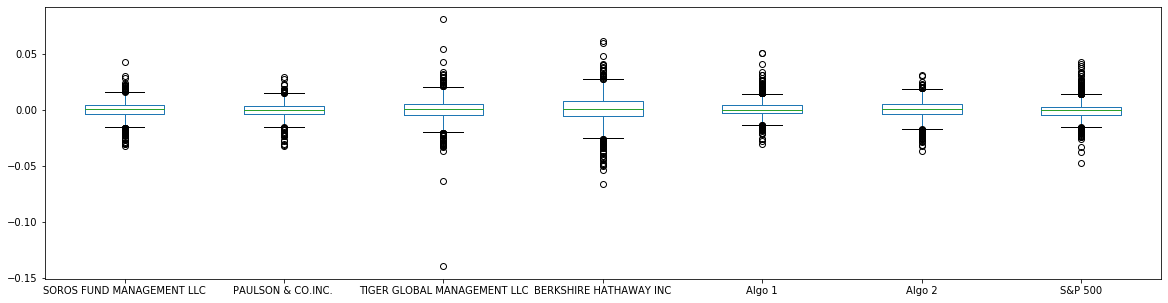

In [83]:
# Box plot to visually show risk
combined_returns.plot(kind='box', legend=True, figsize=(20, 5))

print("Tiger Global Management has largest spread")
print("PAULSON & CO INC has the smallest spread")

In [108]:
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
combined_returns_std = combined_returns.std()
print(combined_returns_std)

print("TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than S&P 500")

SOROS FUND MANAGEMENT LLC      0.009248
PAULSON & CO.INC.              0.007366
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
Algo 1                         0.008437
Algo 2                         0.008788
S&P 500                        0.009605
Custom                         0.013331
dtype: float64
TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier than S&P 500


In [85]:
# Determine which portfolios are riskier than the S&P 500

for i in range(len(combined_returns_std)):
    if (combined_returns_std[i] > combined_returns_std[-1]).all():
        print(True)
    else:
        if (combined_returns_std[i] <= combined_returns_std[-1]).all():
            print(False)
        

False
False
True
True
False
False
False


In [86]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

Yes, the risk increases for each of the portfolios at the same time risk increases in the S&P


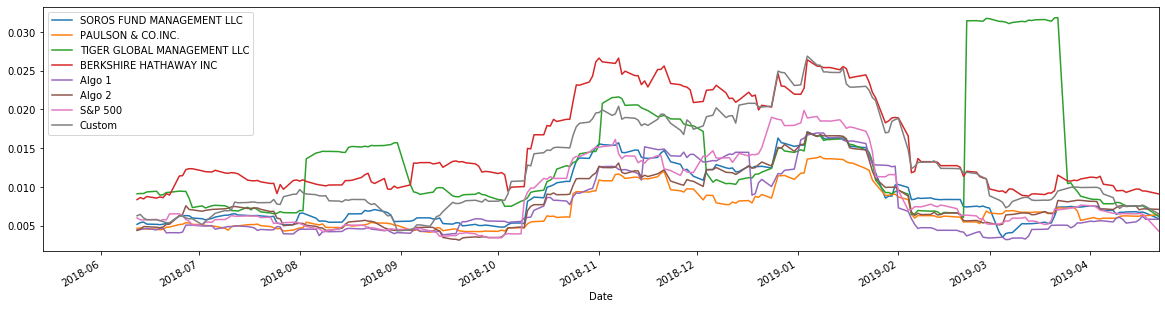

In [109]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_returns.rolling(window=21).std().plot(figsize=(20, 5))

print("Yes, the risk increases for each of the portfolios at the same time risk increases in the S&P")

In [88]:
# Correlation
correlation = combined_returns.corr()
correlation

#PAULSON & CO INC's return is most closely mimic the S&P

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


BERKSHIRE HATHAWAY UNC beta: -0.020846489408902668


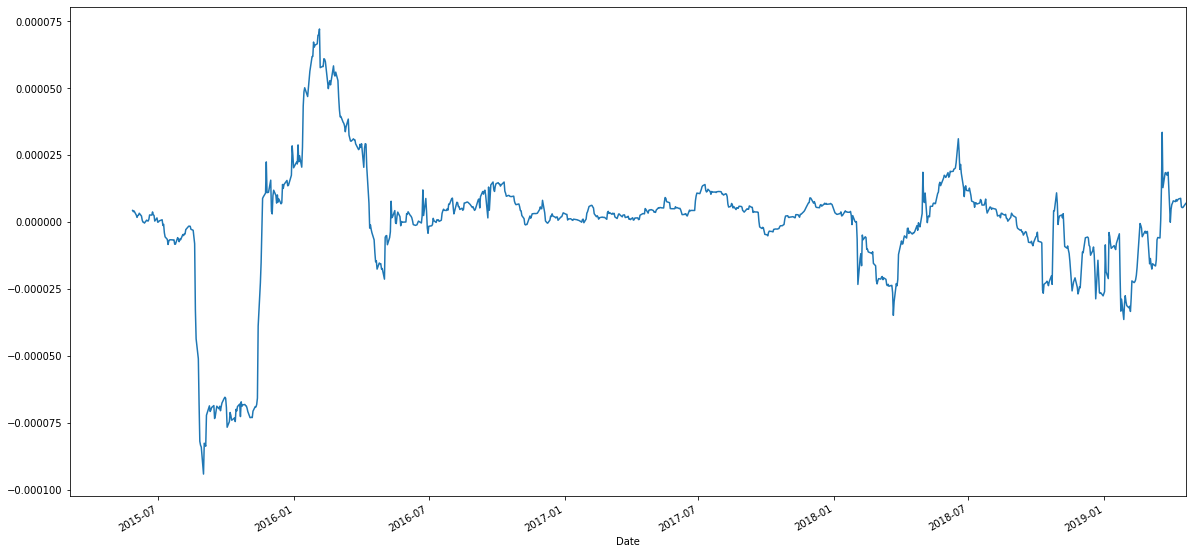

In [89]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
berkshire_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].cov(combined_returns['S&P 500'])
variance = combined_returns['S&P 500'].var()

berkshire_beta = berkshire_covariance / variance

rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns['S&P 500'])
rolling_covariance.plot(figsize=(20, 10))

print(f"BERKSHIRE HATHAWAY UNC beta: {berkshire_beta}")

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [90]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [91]:
# Annualzied Sharpe Ratios
sharpe_ratio = (combined_returns.mean()*252) / (combined_returns.std() *np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

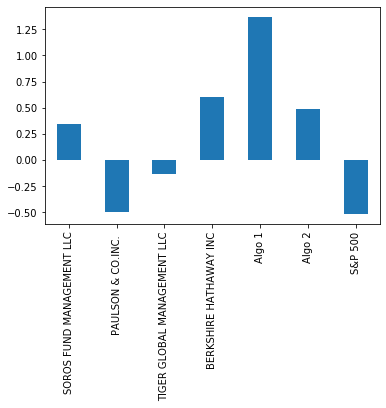

In [92]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [93]:
# Read the first stock
goog_path = Path('/Users/jiwookkim/Desktop/CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/goog_historical.csv')

goog_df = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_df.head(5)

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [94]:
# Read the second stock
appl_path = Path('/Users/jiwookkim/Desktop/CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/aapl_historical.csv')

appl_df = pd.read_csv(appl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
appl_df.head(5)

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [95]:
# Read the third stock
cost_path = Path('/Users/jiwookkim/Desktop/CU-NYC-FIN-PT-08-2019-U-C/02-Homework/04-Pandas/Instructions/Resources/cost_historical.csv')

cost_df = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_df.head(5)

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [96]:
# Concatenate all stocks into a single DataFrame
all_stocks_all = pd.concat([goog_df, appl_df, cost_df], axis="rows", join='inner')
all_stocks_all.head(5)

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [97]:
# Reset the index
all_stocks_reset = all_stocks_all.reset_index()
all_stocks_reset.head(5)

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [98]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
all_stocks_1 = all_stocks_reset.pivot(index='Trade DATE', columns = 'Symbol', values='NOCP')
all_stocks_return = all_stocks_1.pct_change()
all_stocks_return.head(5)

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [99]:
# Drop Nulls
all_stocks_return.dropna(inplace=True)
all_stocks_return.head(5)

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [100]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
all_stocks_portfolio = all_stocks_return.dot(weights)

all_stocks_portfolio.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [101]:
# Only compare dates where the new, custom portfolio has dates
combined_returns['Custom'] = all_stocks_portfolio
combined_returns.dropna(inplace=True)
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [102]:
# Risk
volitility = combined_returns.std() * np.sqrt(252)
volitility

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
S&P 500                        0.152469
Custom                         0.211627
dtype: float64

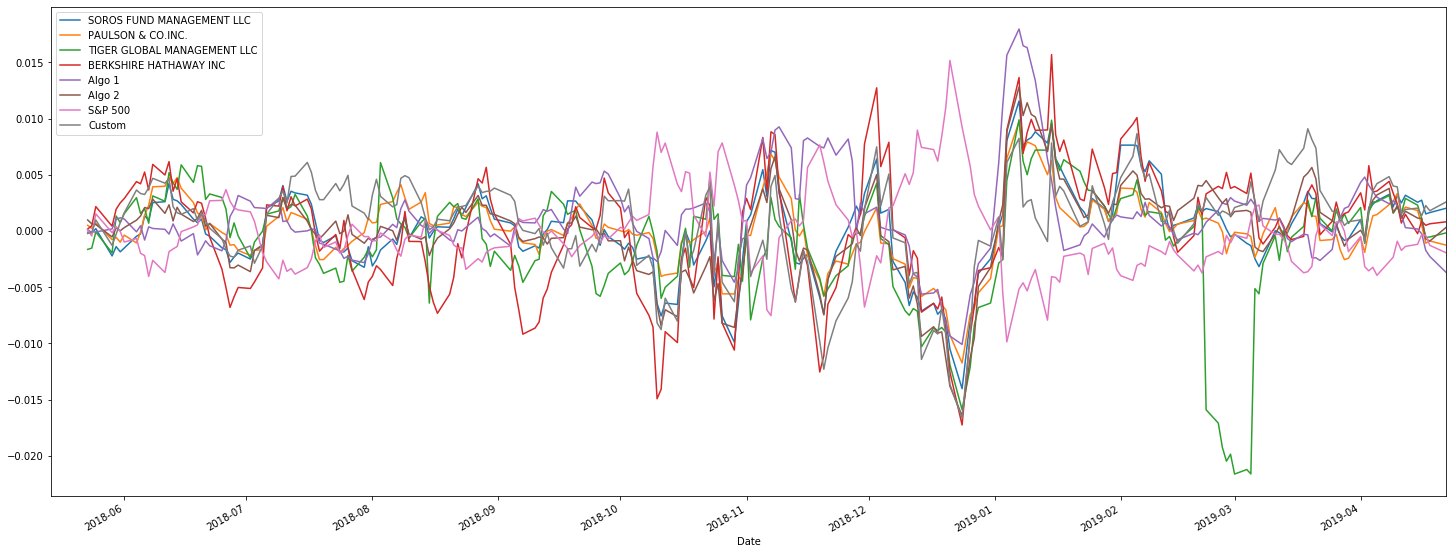

In [103]:
# Rolling
combined_returns.rolling(window=8).mean().plot(figsize=(25,10))

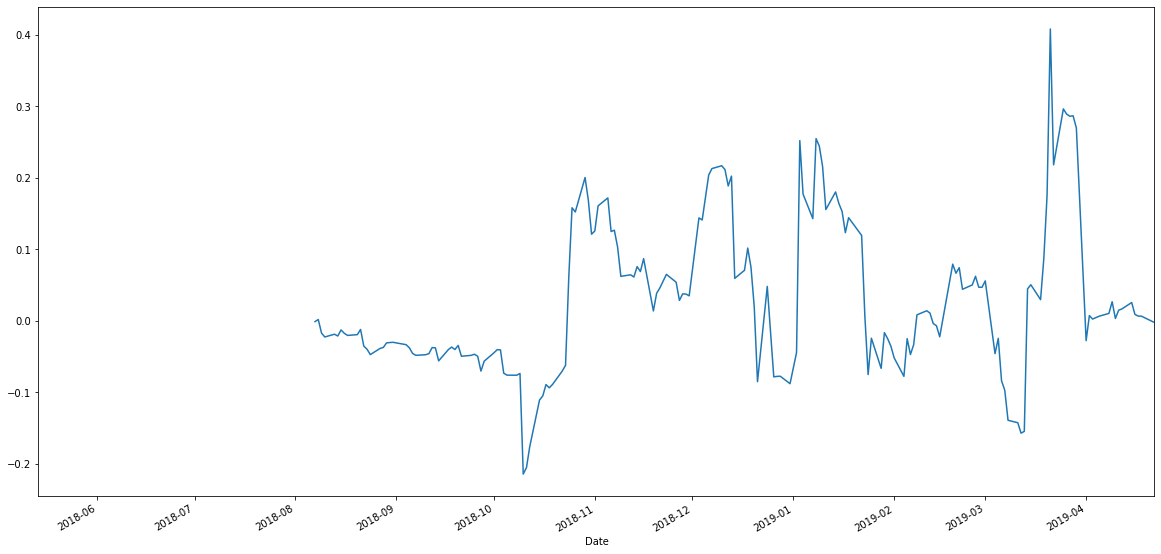

In [107]:
# Beta (Beta = Covariance / Variance)
berkshire_covariance = combined_returns['Custom'].cov(combined_returns['S&P 500'])
variance = combined_returns['S&P 500'].var()

custom_beta = custom_covariance / variance
custom_beta 

rolling_covariance = combined_returns['Custom'].rolling(window=60).cov(combined_returns['S&P 500'])
rolling_variance = combined_returns['S&P 500'].var()

rolling_beta = rolling_covariance / variance
rolling_beta.plot(figsize=(20,10))


In [105]:
# Annualzied Sharpe Ratios
sharpe_ratio = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
Custom                         0.876152
dtype: float64

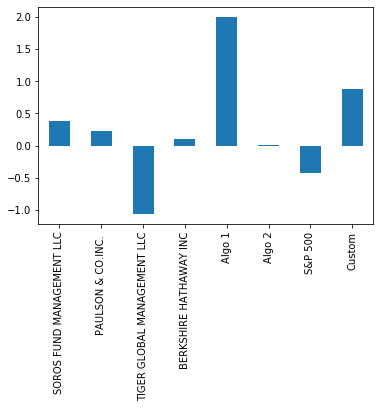

In [106]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

In [52]:
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
Custom,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000
